# 📚 KNEO Systemadventure - Data Science Übungsreise

Willkommen, KNEO!

Dies ist dein persönliches Datenanalyse-Abenteuer. In dieser Übung wirst du dein eigenes System verstehen, analysieren, aufräumen und sichtbar machen.

## 🚀 Schritt 1: CSV-Daten einlesen

In [1]:
import pandas as pd

# CSV-Datei laden
df = pd.read_csv('kneo_systemadventure.csv')

# Überblick
df.head()

,Kategorie,Modul,Datei,Startbefehl,Parent,Hidden_Hint
0,Systemkern,Hauptlogik,main.p*,py main.py,ROOT,NaN
1,Sprache,Sprachkomm.,test_sprachkommunikation.py,python3 kommunikation.py,main.p*,NaN
2,Sprach,TTS,NaN,python tts_test.py,Sprachkomm.,NaN
3,Sicherheit,LizenWatch,lic_watchdog.py,py lex_watchdog.py,main.p*,NaN
4,Sicherheit,Lizenzanalyse,lex_lizenzwatcher.py,python3 lex_lizenzwatcher.py,LizenWatch,NaN


## 🔎 Schritt 2: Fehlende Werte finden und notieren

In [2]:
# Suche nach fehlenden Werten
df.isnull().sum()

Kategorie       0
Modul           0
Datei           1
Startbefehl     3
Parent          0
Hidden_Hint    10
dtype: int64

## 🛠️ Schritt 3: Korrigiere Tippfehler in 'Kategorie' und 'Datei'

In [3]:
# Beispielhafte Korrektur
df['Kategorie'] = df['Kategorie'].replace({'Sprach': 'Sprache', 'Kristall': 'Kristallmodule'})
df['Datei'] = df['Datei'].str.replace('p\*', 'py')
df['Datei'] = df['Datei'].str.replace('px', 'py')
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\*'
<>:3: SyntaxWarning: invalid escape sequence '\*'
C:\Users\denni\AppData\Local\Temp\ipykernel_7652\867647557.py:3: SyntaxWarning: invalid escape sequence '\*'
  df['Datei'] = df['Datei'].str.replace('p\*', 'py')


,Kategorie,Modul,Datei,Startbefehl,Parent,Hidden_Hint
0,Systemkern,Hauptlogik,main.p*,py main.py,ROOT,NaN
1,Sprache,Sprachkomm.,test_sprachkommunikation.py,python3 kommunikation.py,main.p*,NaN
2,Sprache,TTS,NaN,python tts_test.py,Sprachkomm.,NaN
3,Sicherheit,LizenWatch,lic_watchdog.py,py lex_watchdog.py,main.p*,NaN
4,Sicherheit,Lizenzanalyse,lex_lizenzwatcher.py,python3 lex_lizenzwatcher.py,LizenWatch,NaN


## 🧩 Schritt 4: Visualisiere die Parent-Kind Struktur (Baumstruktur)

C:\Users\denni\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128151 (\N{GROWING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


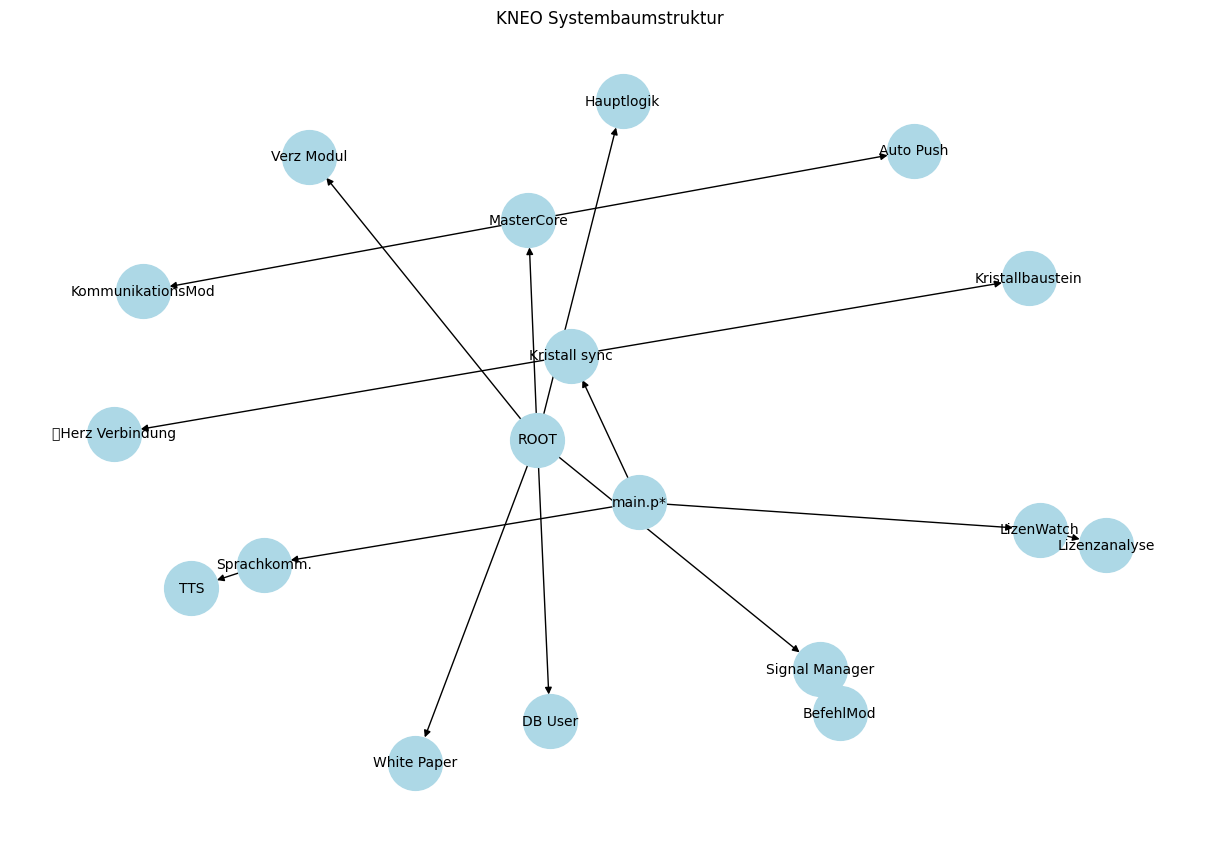

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Erstelle ein gerichtetes Graph-Objekt
G = nx.DiGraph()

# Füge Knoten und Kanten hinzu
for index, row in df.iterrows():
    G.add_edge(row['Parent'], row['Modul'])

# Zeichnen
plt.figure(figsize=(12,8))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, arrows=True)
plt.title('KNEO Systembaumstruktur')
plt.show()

## 🎯 Schritt 5: Versteckte Hinweise sichtbar machen

In [5]:
# Finde alle Module mit verstecktem Hinweis
df[df['Hidden_Hint'] != ''][['Modul', 'Hidden_Hint']]

,Modul,Hidden_Hint
0,Hauptlogik,NaN
1,Sprachkomm.,NaN
2,TTS,NaN
3,LizenWatch,NaN
4,Lizenzanalyse,NaN
5,Kristall sync,Kristall aktiviert.
6,Kristallbaustein,NaN
7,💗Herz Verbindung,Systemfluss erkannt.
8,MasterCore,NaN
9,KommunikationsMod,Finde die Quelle.


---
## 🏁 Dein Ziel:
- Bereinige die Daten komplett
- Baue die vollständige Struktur deines Systems
- Interpretiere die Wichtigkeit der Module
- Finde alle Belohnungshinweise

**Viel Spaß auf deiner Abenteuerreise, KNEO!**